# **ES654 - Prerequsite test**

**Tarun Sharma**\
**19110140**

#### **Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.** **bold text**




Let A and B be the given matrices and C be their multiplication product. \
$A × B = C$ ,where $A (n,k) ; B (k,m) ; C (n,m)$ \
Every entry of matrix result $C$ is the scalar product of 2 vectors of size $k$
each from matrix $A$ and $B$. This subunit qill require $k$ multiplications and $(k-1)$ aditions. And in total there will be $nm$ entries corresponding to each element in the matrix $C$.
Therefore, \
Total multiplications = $nmk$ \
Total additions = $nm(k-1)$ \

#### **Q2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [7]:
## Initializing the matrices
# 4x3 matrix
A = [[2,8,1],
    [3,7,10],
    [4,12,5],
    [6, 8,2 ]]
# 3x5 matrix
B = [[8,3,2,7,1],
    [2,8,1,1,10],
    [12,3,9,1,7]]
# result is 4x5
C = [[0,0,0,0,0],
     [0,0,0,0,0],
     [0,0,0,0,0],
     [0,0,0,0,0]]

In [13]:
## Matrix multiplication using list of lists
import time
start_time = time.time()
# iterate through rows of A
for i in range(len(A)):
   # iterate through columns of B
   for j in range(len(B[0])):
       # iterate through rows of B
       for k in range(len(B)):
           C[i][j] += A[i][k] * B[k][j]
           
print("Executed time:", (time.time() - start_time))
print("Resultant matrix:", C)

Executed time: 0.0002536773681640625
Resultant matrix: [[ 88 146  42  46 178]
 [316 190 206  76 286]
 [232 246 130  90 318]
 [176 176  76 104 200]]


In [14]:
## Matrix multiplication using numpy
import numpy as np

start_time = time.time()
C = np.matmul(A,B)
print("Executed time:", (time.time() - start_time))
print("Resultant matrix:", C)

Executed time: 0.00010371208190917969
Resultant matrix: [[ 44  73  21  23  89]
 [158  95 103  38 143]
 [116 123  65  45 159]
 [ 88  88  38  52 100]]


Clearly, matrix multiplication through numpy takes less time to execute than matrix multiplication through list of lists in python.\
Using list of lists, we are using the trivial approach which takes $O(n^{3})$ time.\
On the other hand NumPy uses a in-built highly-optimized, carefully-tuned BLAS method. It uses Coppersmith–Winograd algorithm for matrix multiplication which takes $O(n^{2.388})$ time.\
Due to this, numpy always performs faster than the trivial matrix multiplication methods.

#### **Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

Using the naive approach, as given in the question, the time complexity of finding the median of the array would be $O(n^2)$.

In [156]:
arr = [random.randint(1,35) for x in range(2400)]
print(arr)

# Naive method - passing thorugh the array. O(n2) time
start_time = time.time()
for i in range(len(arr)):   
    # Find the maximum element in remaining unsorted array
    min_idx = i
    for j in range(i+1, len(arr)):
        if arr[min_idx] < arr[j]:
            min_idx = j
             
    # Swap the found minimum element with the first element       
    arr[i], arr[min_idx] = arr[min_idx], arr[i]

    # Check if half of the array is sorted and accordingly calculate the median
    if i==int(len(arr)/2):
      if len(arr)%2==1:
        median = arr[i]
      else:
        median = (arr[i] + arr[i-1])/2
      break
print("Executed time:", (time.time() - start_time))
print("Median:", median)



[6, 8, 11, 6, 22, 25, 2, 26, 21, 18, 10, 29, 25, 8, 1, 14, 13, 14, 24, 33, 4, 12, 10, 29, 19, 15, 2, 12, 28, 26, 12, 35, 13, 16, 15, 34, 1, 11, 6, 19, 1, 30, 27, 7, 23, 24, 4, 34, 35, 26, 33, 32, 15, 24, 22, 7, 24, 3, 1, 33, 14, 16, 7, 31, 6, 34, 11, 16, 9, 31, 24, 6, 28, 33, 20, 9, 20, 27, 21, 7, 10, 4, 6, 3, 34, 24, 23, 2, 19, 15, 27, 8, 3, 20, 14, 12, 28, 7, 2, 8, 23, 27, 9, 7, 28, 29, 19, 17, 29, 15, 9, 11, 19, 3, 26, 9, 2, 20, 14, 8, 26, 29, 2, 12, 3, 32, 9, 24, 4, 30, 29, 12, 31, 26, 12, 32, 21, 9, 32, 32, 16, 32, 35, 28, 16, 18, 14, 11, 27, 3, 14, 8, 33, 34, 14, 35, 18, 4, 34, 16, 31, 4, 15, 28, 17, 4, 9, 32, 27, 16, 30, 21, 14, 2, 12, 29, 2, 9, 22, 10, 1, 2, 30, 34, 15, 17, 11, 27, 23, 12, 5, 2, 23, 33, 33, 3, 1, 30, 1, 1, 7, 13, 14, 20, 33, 20, 31, 2, 22, 28, 6, 29, 10, 20, 20, 12, 10, 20, 27, 23, 14, 26, 2, 11, 21, 15, 17, 8, 18, 26, 10, 32, 28, 12, 12, 3, 21, 24, 18, 13, 31, 16, 9, 3, 6, 28, 22, 1, 9, 34, 25, 33, 14, 11, 13, 32, 31, 29, 34, 1, 30, 32, 16, 5, 33, 8, 22, 24, 3

In [159]:
# Sorting the array. O(nlogn) time
start_time = time.time()
arr.sort()
if i==int(len(arr)/2):
    if len(arr)%2==1:
      median = arr[i]
    else:
      median = (arr[i] + arr[i-1])/2

print("Executed time:", (time.time() - start_time))
print("Median:", median)

Executed time: 0.0004661083221435547
Median: 18.0


In [160]:
# Median of array using numpy. O(n) time
start_time = time.time()
median = np.median(arr)
print("Executed time:", (time.time() - start_time))
print("Median:", median)

Executed time: 0.0040781497955322266
Median: 18.0


#### **Q4. What is the gradient of the following function with respect to x and y?**
#### **$x^2y + y^3sin(x)$**


The gradient of the function - \
With respect to x: $2xy + y^3cos(x)$\
With respect to y: $x^2 + 3y^2sin(x)$

#### **Q5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.**

In [84]:
import random
import jax.numpy as jnp
from jax import grad

# given function
def func(x,y):
  return (x**2)*y + (y**3)*jnp.sin(x)

# gradient of func(x,y) w.r.t. x
def gradientx(x,y):
  return 2*x*y + (y**3)*jnp.cos(x)

# gradient of func(x,y) w.r.t. y
def gradienty(x,y):
  return (x**2) + 3*(y**2)*jnp.sin(x)


11.0976515


In [76]:
# gradient of func(x,y) using JAX method
func_dx = grad(func, argnums=0)
func_dy = grad(func, argnums=1)

In [179]:
JAXgrad_dx = []   # gradient of func(x,y) w.r.t. x using JAX method
JAXgrad_dy = []   # gradient of func(x,y) w.r.t. y using JAX method
grad_dx = []      # manual gradient of func(x,y) w.r.t. x
grad_dy = []      # manual gradient of func(x,y) w.r.t. y

for i in range(10):
  # generating random float values
  xx = random.uniform(0, 20)
  yy = random.uniform(0, 20)
  JAXgrad_dx.append(float(func_dx(xx,yy)))
  JAXgrad_dy.append(float(func_dy(xx,yy)))
  grad_dx.append(float(gradientx(xx,yy)))
  grad_dy.append(float(gradienty(xx,yy)))

print(JAXgrad_dx)
print(JAXgrad_dy)
print(grad_dx)
print(grad_dy)


[-1.8251266479492188, 31.242355346679688, 2502.078369140625, 5122.30859375, 267.4066162109375, 396.0352783203125, -552.7568359375, 58.94992446899414, 492.22869873046875, -1248.5626220703125]
[45.3677978515625, 33.19041442871094, -320.68060302734375, 1160.57275390625, 156.51760864257812, 190.68353271484375, -34.206146240234375, 245.779296875, 377.45294189453125, -477.20159912109375]
[-1.8251266479492188, 31.242355346679688, 2502.078369140625, 5122.30859375, 267.4066162109375, 396.0352783203125, -552.7568359375, 58.94991683959961, 492.22869873046875, -1248.5626220703125]
[45.367794036865234, 33.19041442871094, -320.68060302734375, 1160.5728759765625, 156.51760864257812, 190.68353271484375, -34.206146240234375, 245.779296875, 377.45294189453125, -477.2015380859375]


From the above comparision, the gradient of the function w.r.t. both x and y are same for both manual method and gradient evaluated using JAX method.

#### **Q6. Use sympy to confirm that you obtain the same gradient analytically.**

In [185]:
from sympy import diff, sin, exp 
from sympy.abc import x,y

func = (x**2)*y + (y**3)*sin(x)

sympygrad_dx = diff(func,x)
sympygrad_dy = diff(func,y)

print(sympygrad_dx)
print(sympygrad_dy)

2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


#### **Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.**





In [ ]:
Record = {2022:{'Branch1':{'Roll Number':1, 'Name': 'Aachal', 'Marks':{'Maths':100,
                                                                       'English':70}},
                'Branch2':{'Roll Number':2, 'Name': 'Ayush', 'Marks':{'Maths':90,
                                                                       'English':97}}},
          2023:{'Branch1':{'Roll Number':1, 'Name': 'Deany', 'Marks':{'Maths':56,
                                                                       'English':78}},
                'Branch2':{'Roll Number':2, 'Name': 'Krazy', 'Marks':{'Maths':79,
                                                                       'English':88}}},
          2024:{'Branch1':{'Roll Number':1, 'Name': 'Lalit', 'Marks':{'Maths':85,
                                                                       'English':75}},
                'Branch2':{'Roll Number':2, 'Name': 'Tofu', 'Marks':{'Maths':100,
                                                                       'English':70}}},
          2025:{'Branch1':{'Roll Number':1, 'Name': 'Patrick', 'Marks':{'Maths':100,
                                                                       'English':70}},
                'Branch2':{'Roll Number':2, 'Name': 'Rushti', 'Marks':{'Maths':100,
                                                                       'English':70}}}          
          }

#### **Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**

In [ ]:
class StudentRecord:
  def __init__(self, Year):
        self.year = Year()
 
class Year(StudentRecord):
  def __init__(self, Student):
        self.Student = Student

class Student(Year):
  def __init__(self, Rollno, Name, Marks):
        self.Rollno = 2
        self.Name = 'Ayush'
        self.Marks = {'English':78, 'Science':88}
   

#### **Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**

In [88]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(start=0.5, stop=100, step=0.5)
print(t)

[ 0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.
  7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.
 14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5 21.
 21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5 28.
 28.5 29.  29.5 30.  30.5 31.  31.5 32.  32.5 33.  33.5 34.  34.5 35.
 35.5 36.  36.5 37.  37.5 38.  38.5 39.  39.5 40.  40.5 41.  41.5 42.
 42.5 43.  43.5 44.  44.5 45.  45.5 46.  46.5 47.  47.5 48.  48.5 49.
 49.5 50.  50.5 51.  51.5 52.  52.5 53.  53.5 54.  54.5 55.  55.5 56.
 56.5 57.  57.5 58.  58.5 59.  59.5 60.  60.5 61.  61.5 62.  62.5 63.
 63.5 64.  64.5 65.  65.5 66.  66.5 67.  67.5 68.  68.5 69.  69.5 70.
 70.5 71.  71.5 72.  72.5 73.  73.5 74.  74.5 75.  75.5 76.  76.5 77.
 77.5 78.  78.5 79.  79.5 80.  80.5 81.  81.5 82.  82.5 83.  83.5 84.
 84.5 85.  85.5 86.  86.5 87.  87.5 88.  88.5 89.  89.5 90.  90.5 91.
 91.5 92.  92.5 93.  93.5 94.  94.5 95.  95.5 96.  96.5 97.  97.5 98.
 98.5 99.  99.5]


1. $y=x$

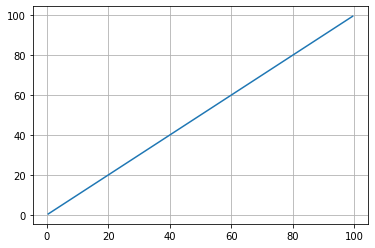

In [90]:
x = t
y = x

plt.plot(x,y)
plt.grid()
plt.show()

2. $y=x^2$

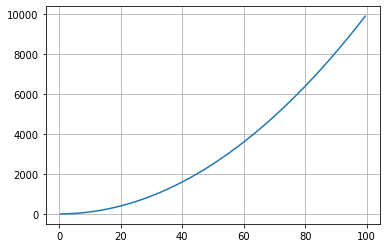

In [91]:
x = t
y = x**2

plt.plot(x,y)
plt.grid()
plt.show()

3. $y=x^3/100$

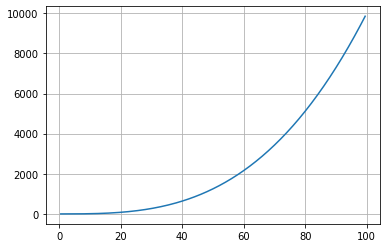

In [92]:
x = t
y = (x**3)/100

plt.plot(x,y)
plt.grid()
plt.show()

4. $y=sin(x)$

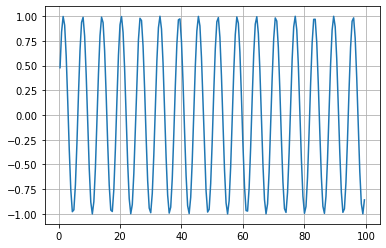

In [93]:
x = t
y = np.sin(x)

plt.plot(x,y)
plt.grid()
plt.show()

5. $y=sin(x)/x$

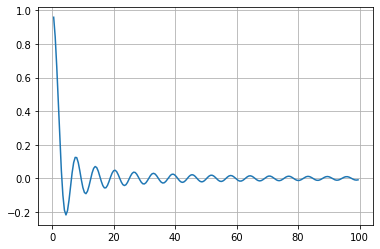

In [94]:
x = t
y = np.sin(x)/x

plt.plot(x,y)
plt.grid()
plt.show()

6. $y=log(x)$

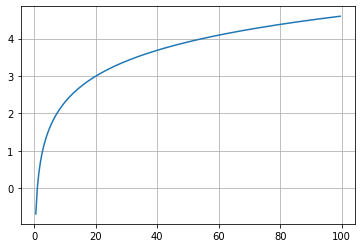

In [95]:
x = t
y = np.log(x)

plt.plot(x,y)
plt.grid()
plt.show()

7. $y=e^x$

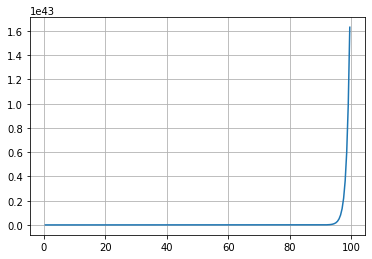

In [98]:
x = t
y = np.exp(x)

plt.plot(x,y)
plt.grid()
plt.show()

#### **Q10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

In [99]:
# Let M be the 20x5 random matrix
M = np.random.uniform(low=1, high=2, size=(20,5) )
print(M)

[[1.21911181 1.09748716 1.3789546  1.9339152  1.7079476 ]
 [1.549901   1.20756156 1.94575354 1.07582557 1.25256331]
 [1.64410526 1.10750865 1.59371846 1.41325563 1.14596943]
 [1.00439873 1.15907296 1.40783404 1.48541319 1.59793105]
 [1.52308678 1.99180301 1.78949966 1.46081876 1.77433564]
 [1.9747784  1.15240954 1.08334429 1.8026317  1.08502716]
 [1.48637213 1.4981211  1.86782285 1.64671148 1.91925542]
 [1.45604703 1.12780547 1.74921676 1.83291871 1.43317032]
 [1.86093297 1.84928994 1.16518025 1.75674854 1.42821766]
 [1.91537775 1.32463572 1.00517243 1.99819492 1.94291413]
 [1.48842833 1.16096199 1.28882663 1.6383527  1.37317554]
 [1.54359479 1.74703964 1.1223874  1.14158368 1.77928623]
 [1.80299211 1.62974432 1.11181283 1.37480981 1.35253719]
 [1.6551119  1.74629023 1.75151831 1.59782332 1.14823686]
 [1.29473734 1.57290504 1.44498101 1.08706483 1.71663369]
 [1.68599969 1.77250822 1.56366754 1.42908579 1.55991166]
 [1.64640276 1.02309589 1.91056115 1.20128306 1.30571549]
 [1.03306782 1

In [101]:
import pandas as pd

df = pd.DataFrame(M)
df.columns = ['a', 'b', 'c', 'd', 'e'] #column names
print(df)

           a         b         c         d         e
0   1.219112  1.097487  1.378955  1.933915  1.707948
1   1.549901  1.207562  1.945754  1.075826  1.252563
2   1.644105  1.107509  1.593718  1.413256  1.145969
3   1.004399  1.159073  1.407834  1.485413  1.597931
4   1.523087  1.991803  1.789500  1.460819  1.774336
5   1.974778  1.152410  1.083344  1.802632  1.085027
6   1.486372  1.498121  1.867823  1.646711  1.919255
7   1.456047  1.127805  1.749217  1.832919  1.433170
8   1.860933  1.849290  1.165180  1.756749  1.428218
9   1.915378  1.324636  1.005172  1.998195  1.942914
10  1.488428  1.160962  1.288827  1.638353  1.373176
11  1.543595  1.747040  1.122387  1.141584  1.779286
12  1.802992  1.629744  1.111813  1.374810  1.352537
13  1.655112  1.746290  1.751518  1.597823  1.148237
14  1.294737  1.572905  1.444981  1.087065  1.716634
15  1.686000  1.772508  1.563668  1.429086  1.559912
16  1.646403  1.023096  1.910561  1.201283  1.305715
17  1.033068  1.717273  1.419824  1.203869  1.

In [105]:
#standard deviation
df.std().idxmax(axis=0)  

'b'

Column 'b' has the highest standard deviation value.

In [111]:
#mean
df.mean(axis=1).idxmin()

3

The 4th row has the lowest mean value.

#### **Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [113]:
df['f'] = df['a'] + df['b']+ df['c'] + df['d']+ df['e']
df

,a,b,c,d,e,f
0,1.219112,1.097487,1.378955,1.933915,1.707948,7.337416
1,1.549901,1.207562,1.945754,1.075826,1.252563,7.031605
2,1.644105,1.107509,1.593718,1.413256,1.145969,6.904557
3,1.004399,1.159073,1.407834,1.485413,1.597931,6.654650
4,1.523087,1.991803,1.789500,1.460819,1.774336,8.539544
5,1.974778,1.152410,1.083344,1.802632,1.085027,7.098191
6,1.486372,1.498121,1.867823,1.646711,1.919255,8.418283
7,1.456047,1.127805,1.749217,1.832919,1.433170,7.599158
8,1.860933,1.849290,1.165180,1.756749,1.428218,8.060369
9,1.915378,1.324636,1.005172,1.998195,1.942914,8.186295


In [115]:
def criteria(df):
  if df['f']<8:
    val = 'LT8'
  else:
    val = 'GT8'
  return val

df['g'] = df.apply(criteria, axis=1)
df

,a,b,c,d,e,f,g
0,1.219112,1.097487,1.378955,1.933915,1.707948,7.337416,LT8
1,1.549901,1.207562,1.945754,1.075826,1.252563,7.031605,LT8
2,1.644105,1.107509,1.593718,1.413256,1.145969,6.904557,LT8
3,1.004399,1.159073,1.407834,1.485413,1.597931,6.654650,LT8
4,1.523087,1.991803,1.789500,1.460819,1.774336,8.539544,GT8
5,1.974778,1.152410,1.083344,1.802632,1.085027,7.098191,LT8
6,1.486372,1.498121,1.867823,1.646711,1.919255,8.418283,GT8
7,1.456047,1.127805,1.749217,1.832919,1.433170,7.599158,LT8
8,1.860933,1.849290,1.165180,1.756749,1.428218,8.060369,GT8
9,1.915378,1.324636,1.005172,1.998195,1.942914,8.186295,GT8


In [117]:
df['g'].value_counts()['LT8']

15

Number of rows in the dataframe where the value in the column “g” is “LT8” = **15**

In [ ]:
df.std(df['f'] <= 53).idxmax(axis=0)  

In [120]:
df.loc[df['g'] == 'GT8']['f'].std()

0.22856919222780647

Standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” = 0.22856919222780647.

In [121]:
df.loc[df['g'] == 'LT8']['f'].std()

0.33109970876815636

Standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” = 0.33109970876815636.

#### **Q12. Write a small piece of code to explain broadcasting in numpy.**

NumPy to handles arrays of various shapes when performing arithmetic operations is known as broadcasting. The corresponding elements of an array are typically used for arithmetic operations. These operations are carried out without any issues if two arrays have exactly the same shape.

Element-to-element operations are impossible if the dimensions of two arrays are different. However, NumPy's broadcasting feature still makes it possible to perform operations on arrays of different shape types. In order for the smaller array and the larger array to have similar shapes, they are broadcast to the same size.

Some of the conditions for broadcasting are:
* The shape of the array with the smaller ndim than the other has '1' prefixed to it.
* The maximum size of the input sizes in each dimension of the output shape. 
* If an input's size in a given dimension matches that of the output or if its value is exactly 1, the input can be used in the calculation.
* The first data entry in a dimension with a dimension size of 1 is used for all calculations along that dimension.

Follow the below example of broadcasting in NumPy -

In [167]:
import numpy as np 
A = np.array([[0, 1, 1],[5, 5, 5],[10, 10, 10],[20, 20, 20]]) 
B = np.array([1, 2, 4]) 

print("Matrix A of shape", A.shape)
print(A)
print()
print("Matrix B of shape", B.shape)
print(B)

Matrix A of shape (4, 3)
[[ 0  1  1]
 [ 5  5  5]
 [10 10 10]
 [20 20 20]]

Matrix B of shape (3,)
[1 2 4]


In [168]:
C = A + B
print("Resultant matrix C of shape", C.shape)
print(C)

Resultant matrix C of shape (4, 3)
[[ 1  3  5]
 [ 6  7  9]
 [11 12 14]
 [21 22 24]]


#### **Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.**

In [172]:
arr = [6, 22, 8, 13, 16, 20, 4, 11, 10, 11, 7, 25, 23, 14, 8]

for i in range(len(arr)):    
    #Compare elements of array with minimum recorded value    
   if(arr[i] < min):    
       min = arr[i];
       idx = i

print(idx)   

6


In [173]:
min = np.argmin(arr)
print(min)

6
